In [3]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score,classification_report,accuracy_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [4]:
from xgboost import XGBClassifier

In [5]:
#Load Data
train = pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\train.csv")
test=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\test.csv")
submission_data=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\sample_submission.csv")

In [6]:
#columns based on datatypes seperated
ignore_col=['employee_id']
target_col=['is_promoted']
num_col=[]
cat_col=[]
for col in train.columns:
    if col not in ignore_col + target_col:
        if train[col].dtypes == 'object':
            cat_col.append(col)
        else:
            num_col.append(col)

In [9]:
#categorical and numerical columns imputed and encoded
#categorical columns imputed by mode and encoded by onehotencoder
#numerical columns imputed by median and encoded by standardscalar
cat_pipe_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
num_pip_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('standardscalar',StandardScaler())
])
## map tranformation to features
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_col),
        ('num_encode',num_pip_encode,num_col)
    ]
)

In [13]:
X=train.drop(columns=target_col+ignore_col)
y=train[target_col]

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=42, test_size=0.3)

In [17]:
def evalution(train_X,train_y,val_X,val_y,model):
    predicted_train_tgt = model.predict(train_X)
    predicted_val_tgt = model.predict(val_X)
    
    # print("accuracy score train",accuracy_score(train_y,predicted_train_tgt))
    # print("accuracy score test",accuracy_score(val_y,predicted_val_tgt))
    
    print("f1score train",f1_score(train_y,predicted_train_tgt))
    print("f1score test",f1_score(val_y,predicted_val_tgt))
    
    # print("classification train \n",classification_report(train_y,predicted_train_tgt))
    # print("classification test \n",classification_report(val_y,predicted_val_tgt))

In [20]:
model = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('model', XGBClassifier(
            colsample_bytree=0.6,
            gamma=0,
            learning_rate=0.4555,
            max_depth=2,
            n_estimators=950,
            subsample=0.6
        ))
    ]
)

model.fit(train_X, train_y)
evalution(train_X, train_y, val_X, val_y, model)


f1score train 0.5448058761804827
f1score test 0.5023696682464455


In [22]:
submission_data['is_promoted']=model.predict(test)
submission_data.to_csv('model.csv', index=False)

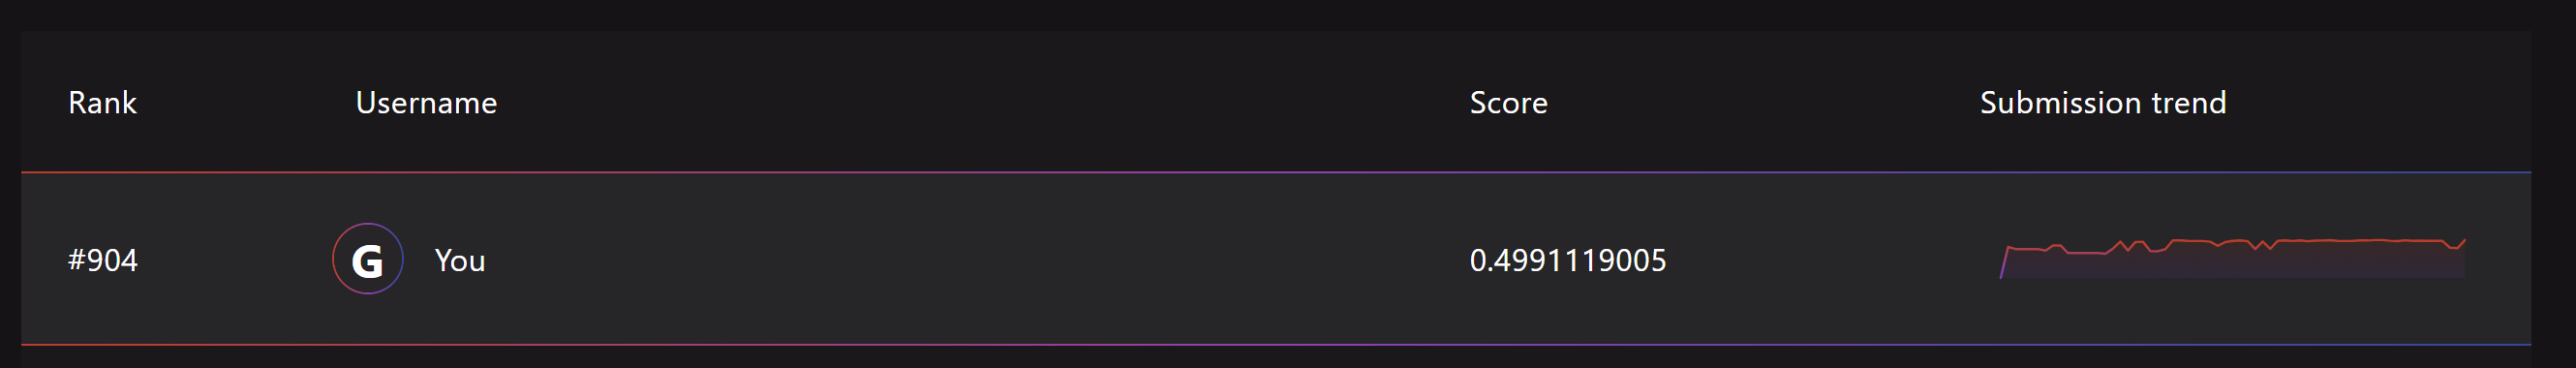

In [25]:
import joblib
joblib.dump(model,'Promotion_prediction_model.pkl')

['Promotion_prediction_model.pkl']